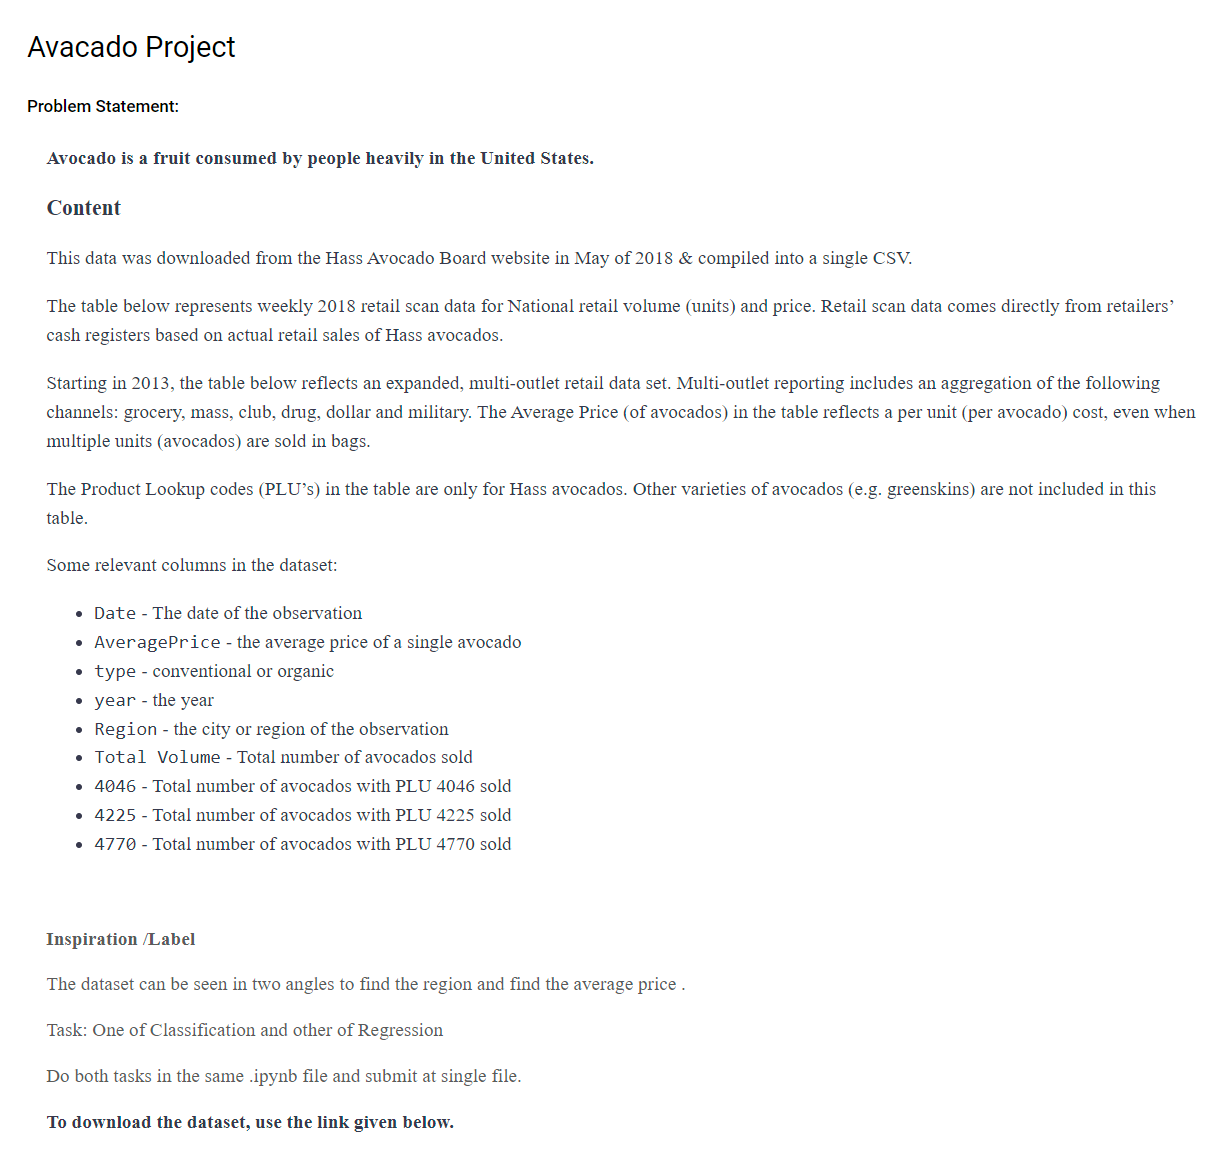

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv("avocado.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

# Observation

this dataset has massive 18k rows and 14 columns

unnamed column number actually resets with new region so it counts number of rows for each region so its not significant in prediction so i am dropping it

In [59]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.shape

(18249, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Observation

We have integer,float,and object data in dataset

In [9]:
df.describe(include="all")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,NewOrleansMobile
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


# observation

we can see 50% and mean data some columns are skewed like total volumne,4046,4225,4770total bags,small bags,large bags,xlarge bags

and comparing 75% and max we can see there are possible outliers in columns like total volumne,4046,4225,4770total bags,small bags,large bags,xlarge bags

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [12]:
df["region"].value_counts()

NewOrleansMobile       338
Orlando                338
Southeast              338
NewYork                338
Columbus               338
Spokane                338
SouthCarolina          338
Jacksonville           338
NorthernNewEngland     338
HarrisburgScranton     338
LosAngeles             338
BaltimoreWashington    338
Denver                 338
Midsouth               338
Boise                  338
Northeast              338
California             338
HartfordSpringfield    338
Syracuse               338
Charlotte              338
MiamiFtLauderdale      338
CincinnatiDayton       338
Roanoke                338
LasVegas               338
Detroit                338
Louisville             338
Boston                 338
Pittsburgh             338
BuffaloRochester       338
Tampa                  338
Sacramento             338
RaleighGreensboro      338
Houston                338
DallasFtWorth          338
Atlanta                338
RichmondNorfolk        338
Nashville              338
W

# observaton

our target variable region is almost balanced

In [13]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

# observation

data is collected from 2015 to 2018

avocado produced method  are conventional and organic

# null value check

<AxesSubplot:>

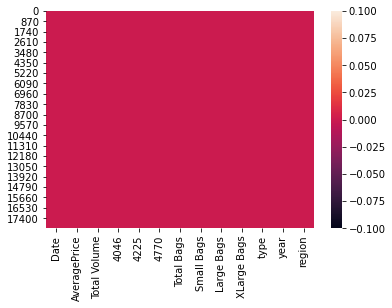

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# observation

there are not null values

# univariate analysis

<AxesSubplot:>

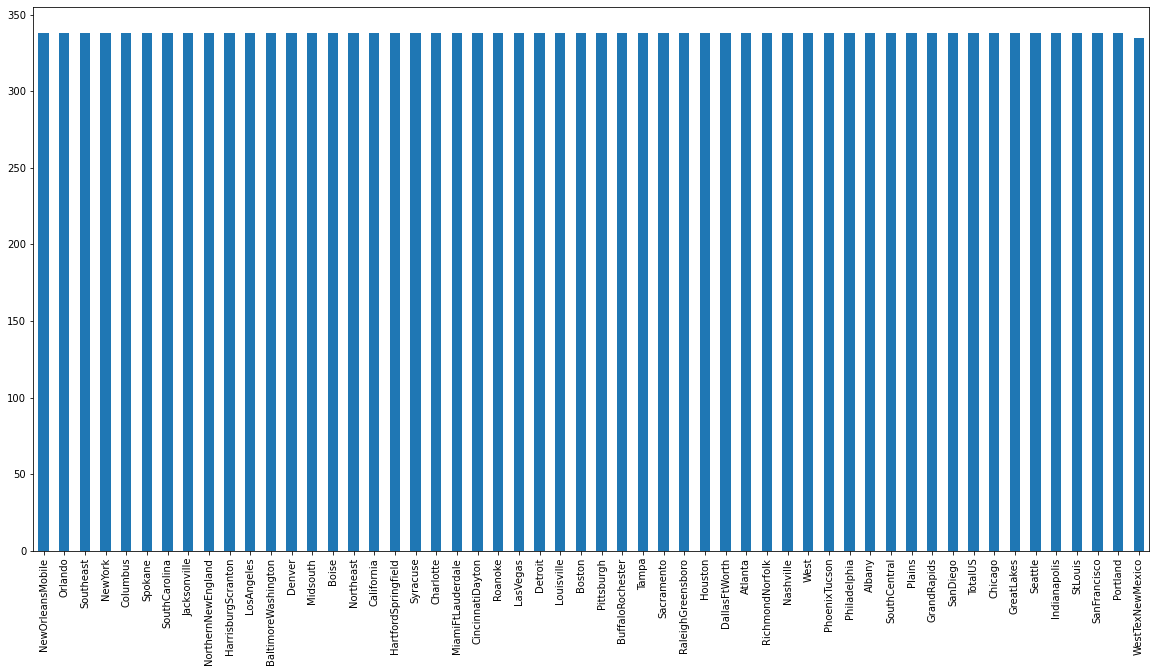

In [17]:
df["region"].value_counts().plot(kind="bar",figsize=(20,10))

# observation

Our target variable is balanced so no need to use Smote

<AxesSubplot:xlabel='year', ylabel='count'>

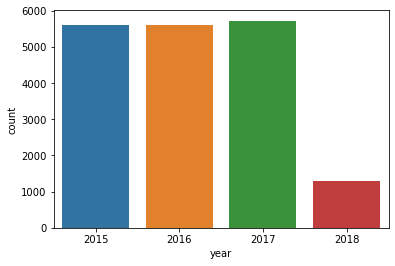

In [18]:
sns.countplot(df["year"])

# observation

it seems 2018 data is less

<AxesSubplot:xlabel='type', ylabel='count'>

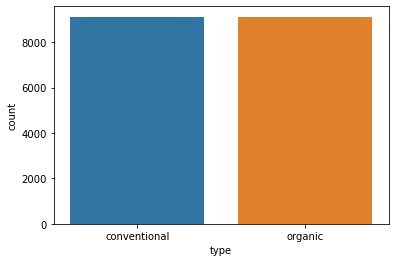

In [19]:
sns.countplot(df['type'])

# observation

both organic and conventional have equal no of datas .

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

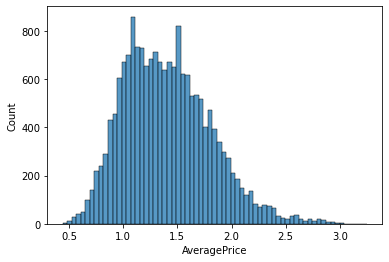

In [20]:
sns.histplot(df["AveragePrice"])

# observation

it seems average price is slighly positively skewed s

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

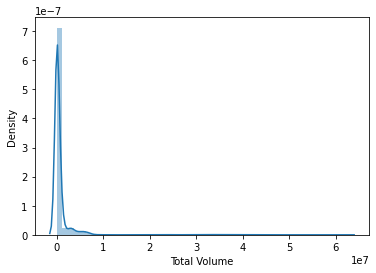

In [21]:
sns.distplot(df["Total Volume"])

# observation

Total Volume is definetly highly  positively skewed 

<AxesSubplot:xlabel='4046', ylabel='Density'>

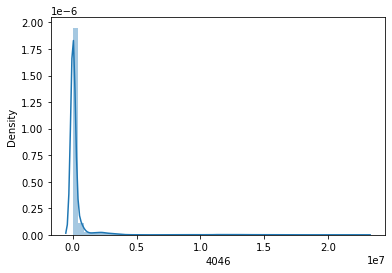

In [22]:
sns.distplot(df["4046"])

# observation

4046 is positively skewed 

<AxesSubplot:xlabel='4225', ylabel='Density'>

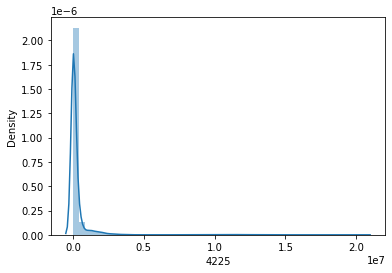

In [23]:
sns.distplot(df["4225"])

# observation



4225 is positively skewed

<AxesSubplot:xlabel='4770', ylabel='Density'>

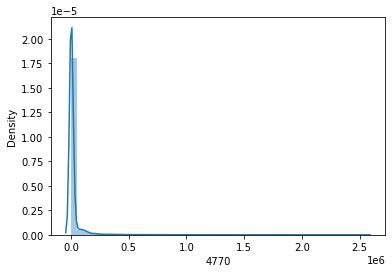

In [24]:
sns.distplot(df["4770"])

# observation

4770 is also positively skewed

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

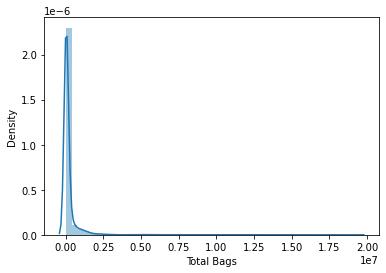

In [25]:
sns.distplot(df["Total Bags"])

# observation

Total bags is also positively skewed

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

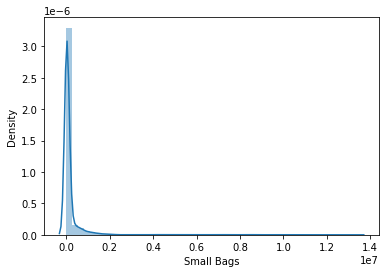

In [26]:
sns.distplot(df['Small Bags'])

# Observation

Small Bags is positively skewed

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

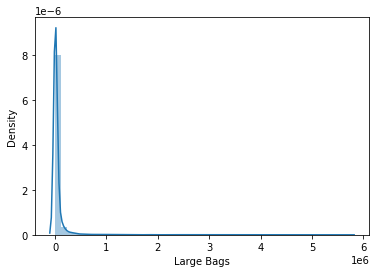

In [27]:
sns.distplot(df['Large Bags'])

# observation

Large Bags is positively skewed

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

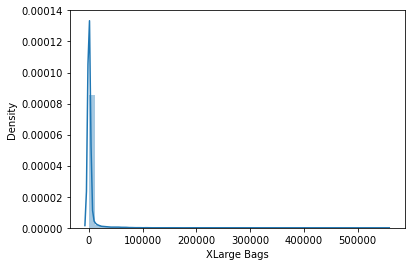

In [28]:
sns.distplot(df['XLarge Bags'])

# Observation

XLarge Bags is also positively skewed

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

<AxesSubplot:>

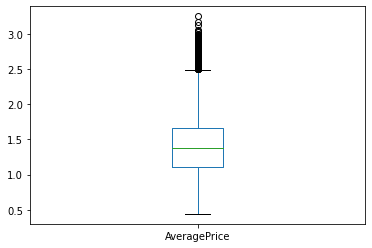

In [5]:
df['AveragePrice'].plot.box()

<AxesSubplot:>

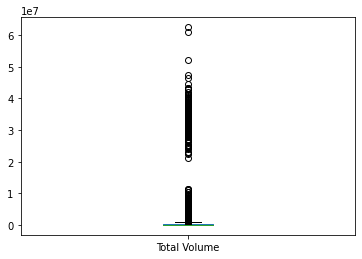

In [6]:
df['Total Volume'].plot.box()

<AxesSubplot:>

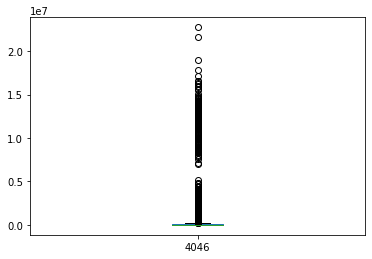

In [7]:
df['4046'].plot.box()

# i am going ot use loop to plot for rest of the columns

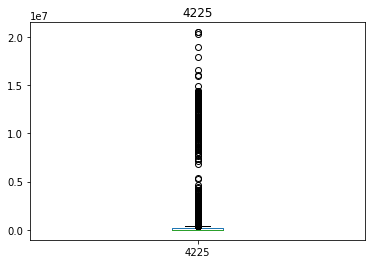

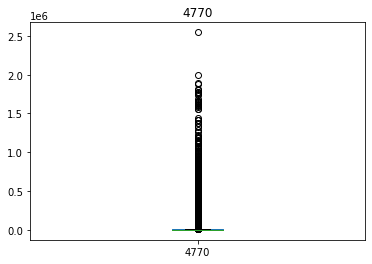

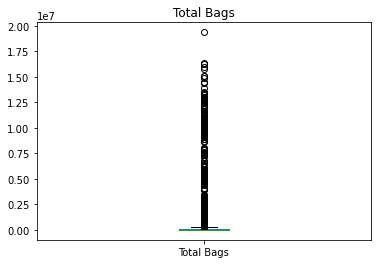

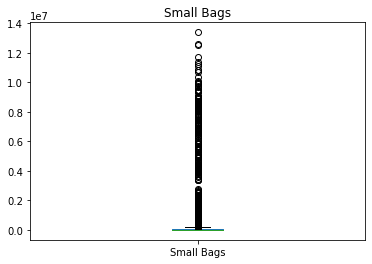

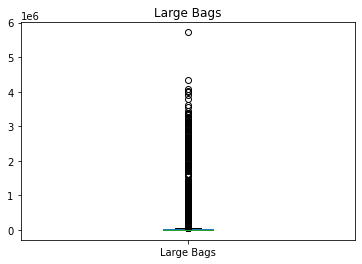

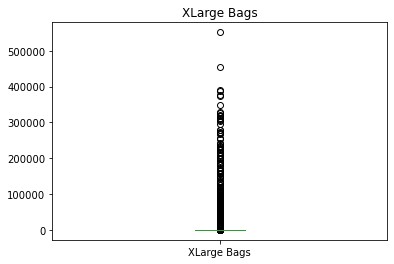

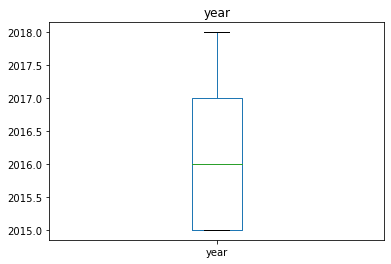

In [9]:
uni = ['4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']
for u in uni:
    df[u].plot.box()
    plt.title(u)
    plt.show()

# Observation

4225,4770, Total Bags, Small Bags, Large Bags, XLarge Bags have outliers

# Bivariate Analysis

In [29]:
gb1=df.groupby("year")["region"].value_counts()
gb1

year  region             
2015  Albany                 104
      Atlanta                104
      BaltimoreWashington    104
      Boise                  104
      Boston                 104
      BuffaloRochester       104
      California             104
      Charlotte              104
      Chicago                104
      CincinnatiDayton       104
      Columbus               104
      DallasFtWorth          104
      Denver                 104
      Detroit                104
      GrandRapids            104
      GreatLakes             104
      HarrisburgScranton     104
      HartfordSpringfield    104
      Houston                104
      Indianapolis           104
      Jacksonville           104
      LasVegas               104
      LosAngeles             104
      Louisville             104
      MiamiFtLauderdale      104
      Midsouth               104
      Nashville              104
      NewOrleansMobile       104
      NewYork                104
      Northeast  

In [30]:
gb2=df.groupby("year")["Total Volume"].mean()
gb2

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

# observation

 total volumne is high for 2017 and very low on 2018

In [31]:

gb3=df.groupby("year")['AveragePrice'].mean()
gb3

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

# observations

it seems the volume is increased from 2015 to 2017 and suddenly dropped by 2018

and average price becomes high in 2017 even though volume is increased and dropped in 2018

the 2018 is not the year for avocados it seems :)

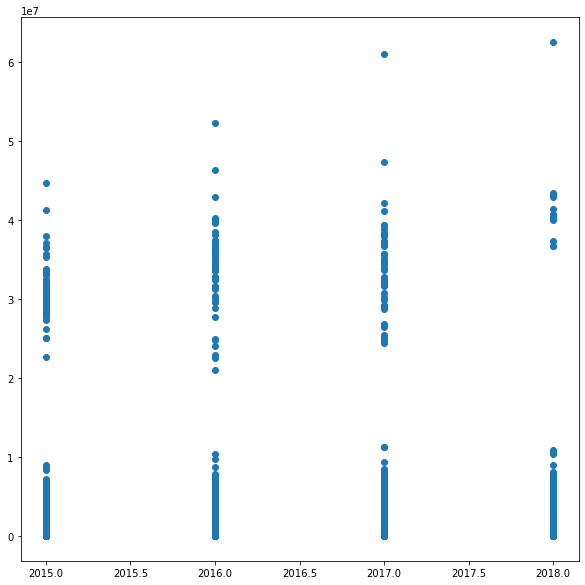

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df["year"],df["Total Volume"])

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

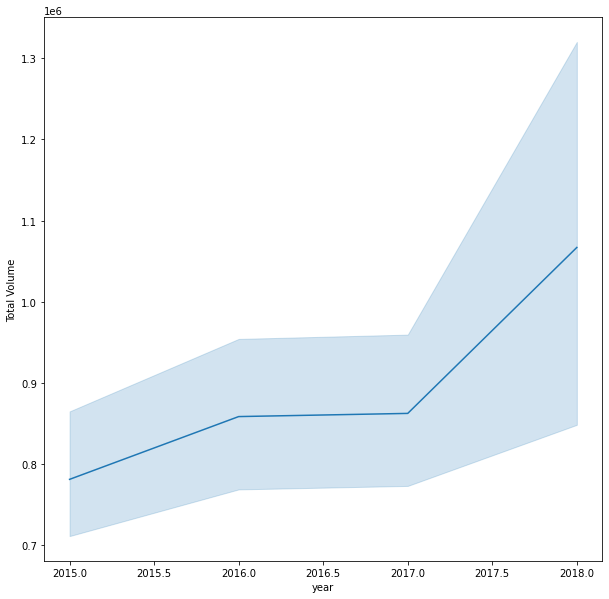

In [11]:
plt.figure(figsize=(10,10))
sns.lineplot(df["year"],df["Total Volume"])

# Observation

Volume is gradually increasing as year passes but drops in 2018

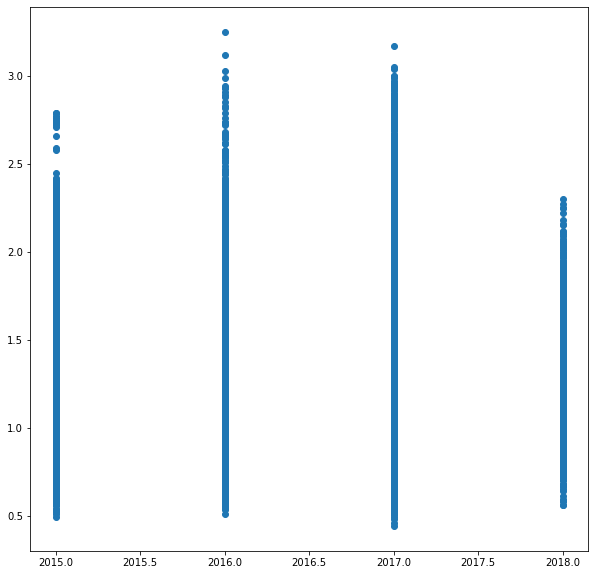

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(df["year"],df["AveragePrice"])

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

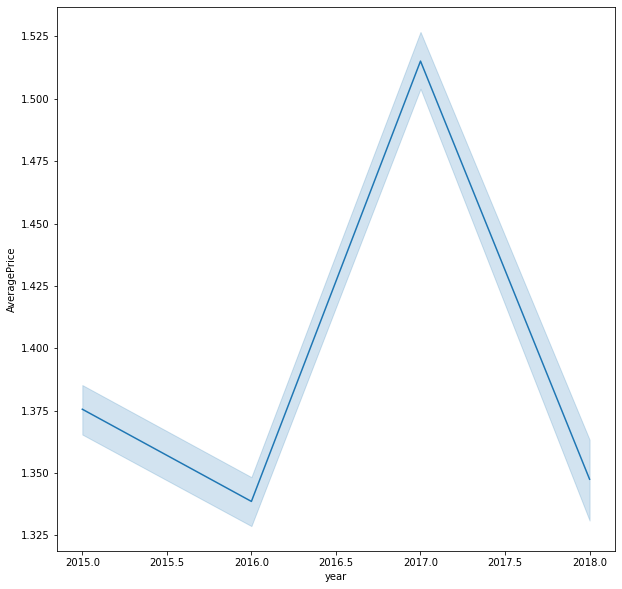

In [12]:
plt.figure(figsize=(10,10))
sns.lineplot(df["year"],df["AveragePrice"])

# observations

average prices increase with year and drops at 2018

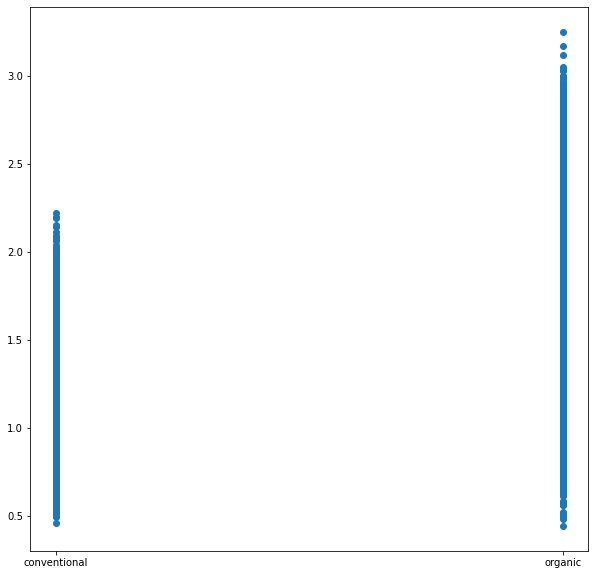

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df["type"],df["AveragePrice"])

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

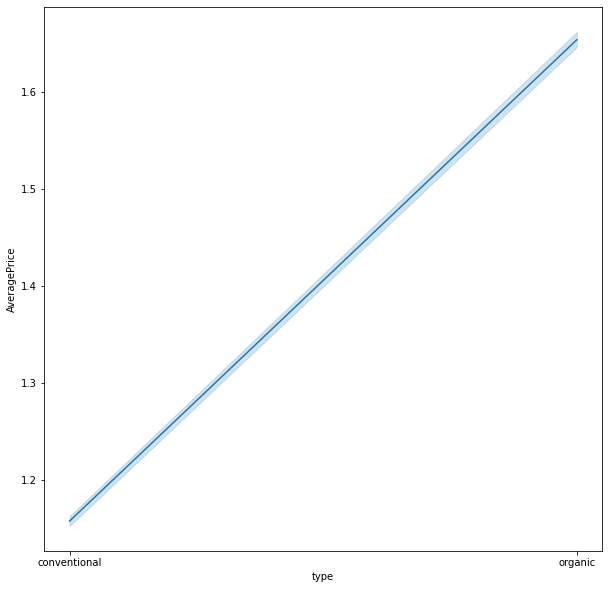

In [13]:
plt.figure(figsize=(10,10))
sns.lineplot(df["type"],df["AveragePrice"])

# Observation

price is higher for orgainc compared to conventional

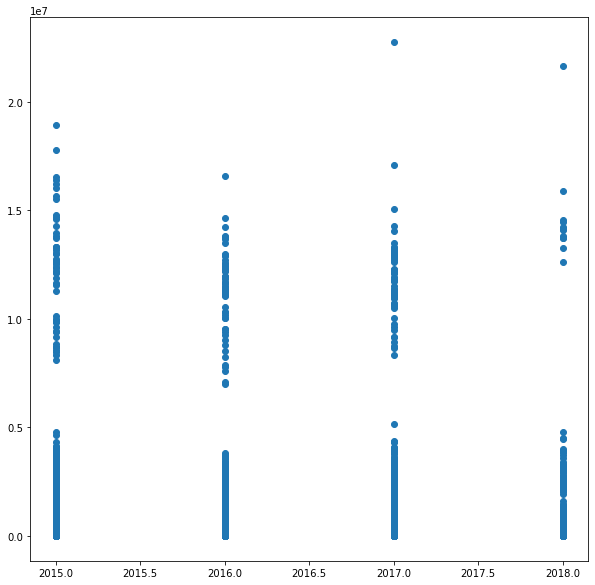

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df["year"],df["4046"])

<AxesSubplot:xlabel='year', ylabel='4046'>

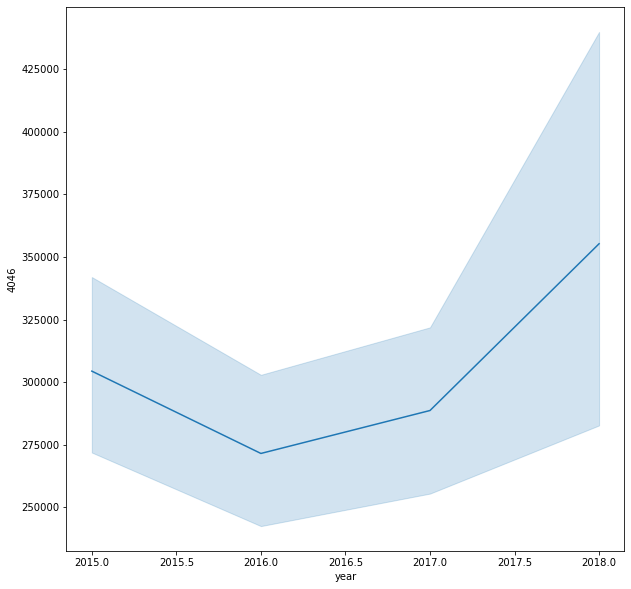

In [14]:
plt.figure(figsize=(10,10))
sns.lineplot(df["year"],df["4046"])

# Observation

the sales of 4046 seems to increasing with year

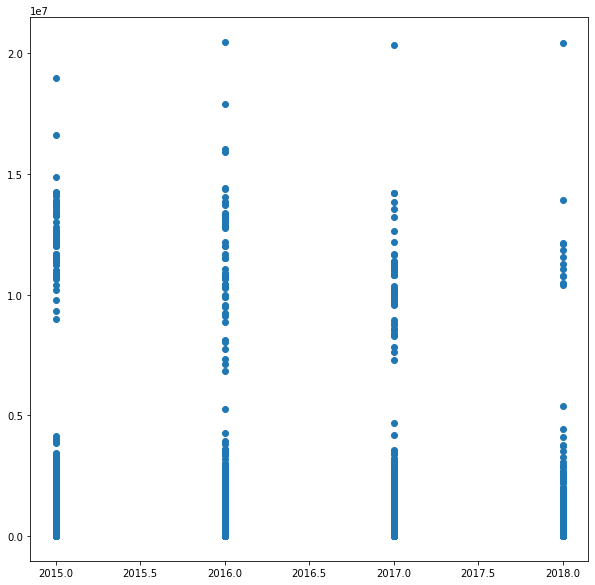

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(df["year"],df["4225"])

<AxesSubplot:xlabel='year', ylabel='4225'>

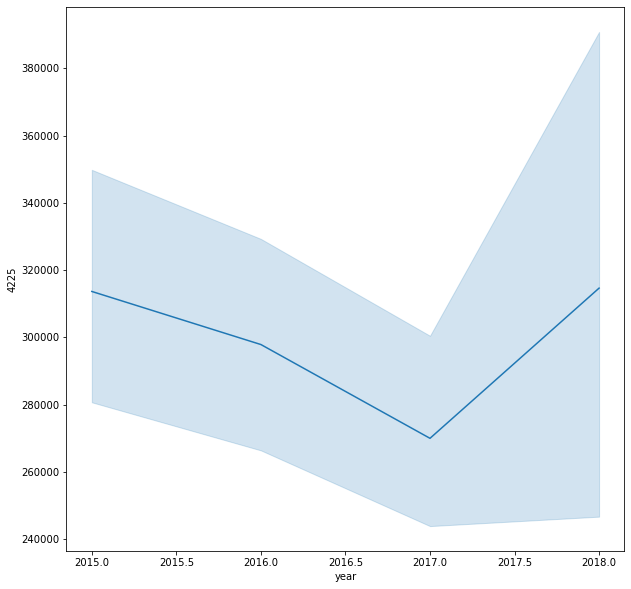

In [15]:
plt.figure(figsize=(10,10))
sns.lineplot(df["year"],df["4225"])

# Observation

the sales of 4225 seems to increasing with year

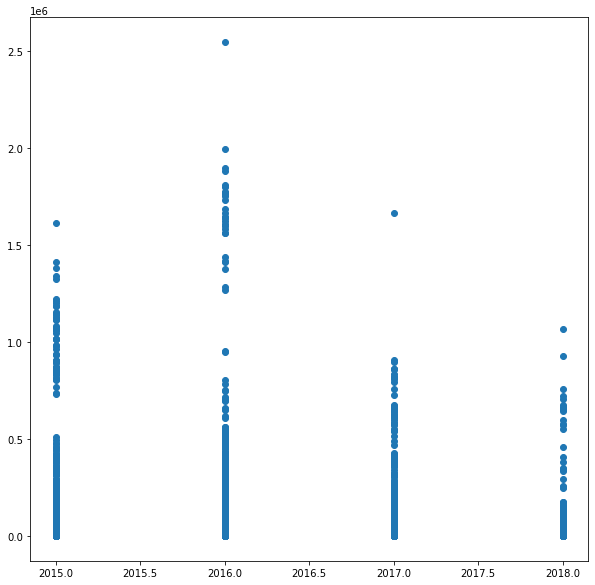

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(df["year"],df["4770"])

<AxesSubplot:xlabel='year', ylabel='4770'>

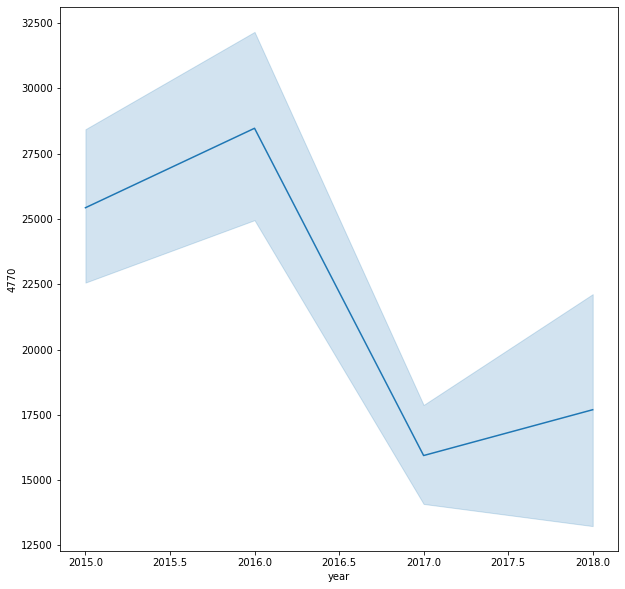

In [17]:
plt.figure(figsize=(10,10))
sns.lineplot(df["year"],df["4770"])

# Observation

it seems the sale of 4770 seems to drop

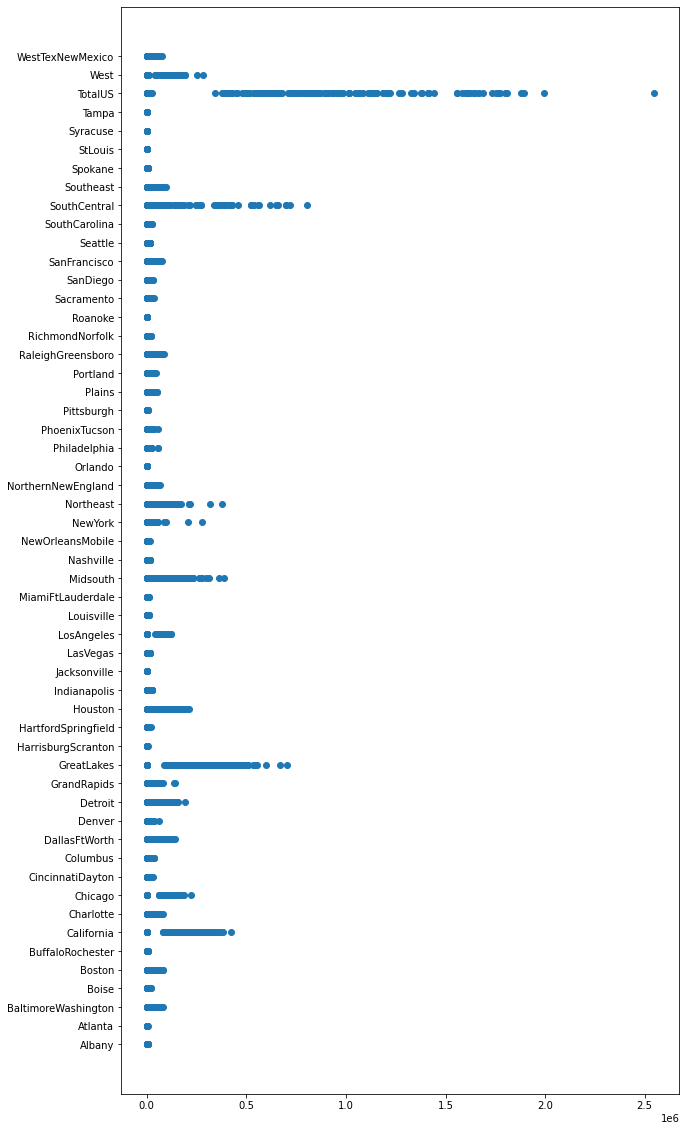

In [39]:
plt.figure(figsize=(10,20))
plt.scatter(df["4770"],df["region"])

# Observation

south central, greatlakes have higher 4770  sold

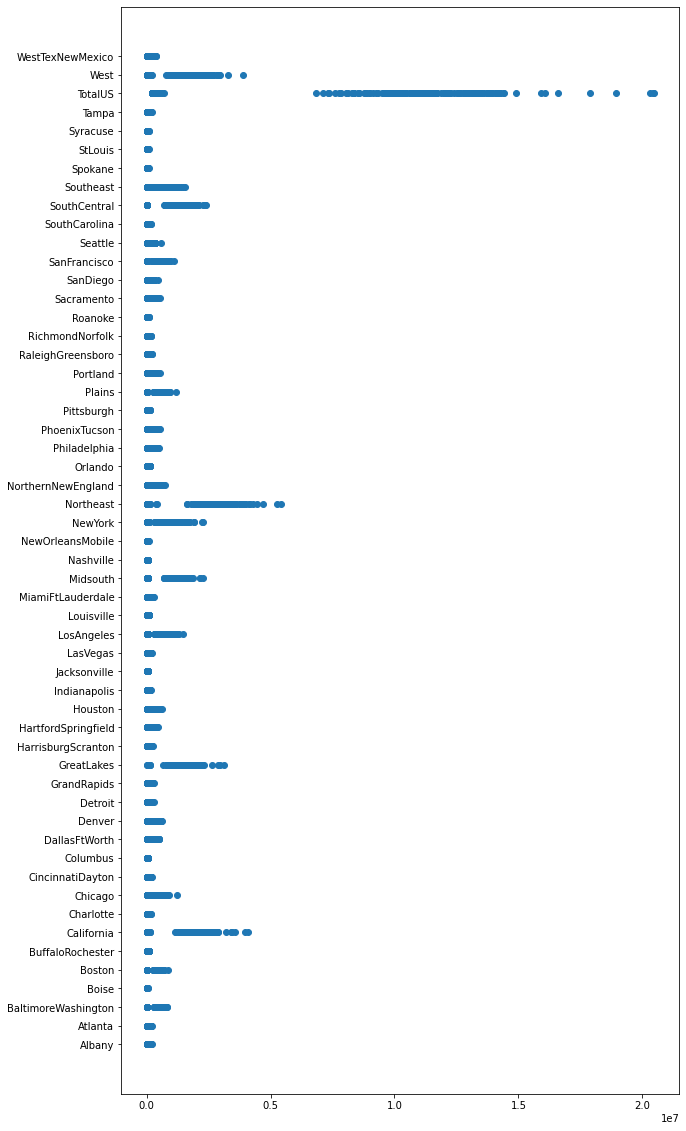

In [18]:
plt.figure(figsize=(10,20))
plt.scatter(df["4225"],df["region"])

# observation

California.Great Lakes, North East, New work have higher sales with 4225 

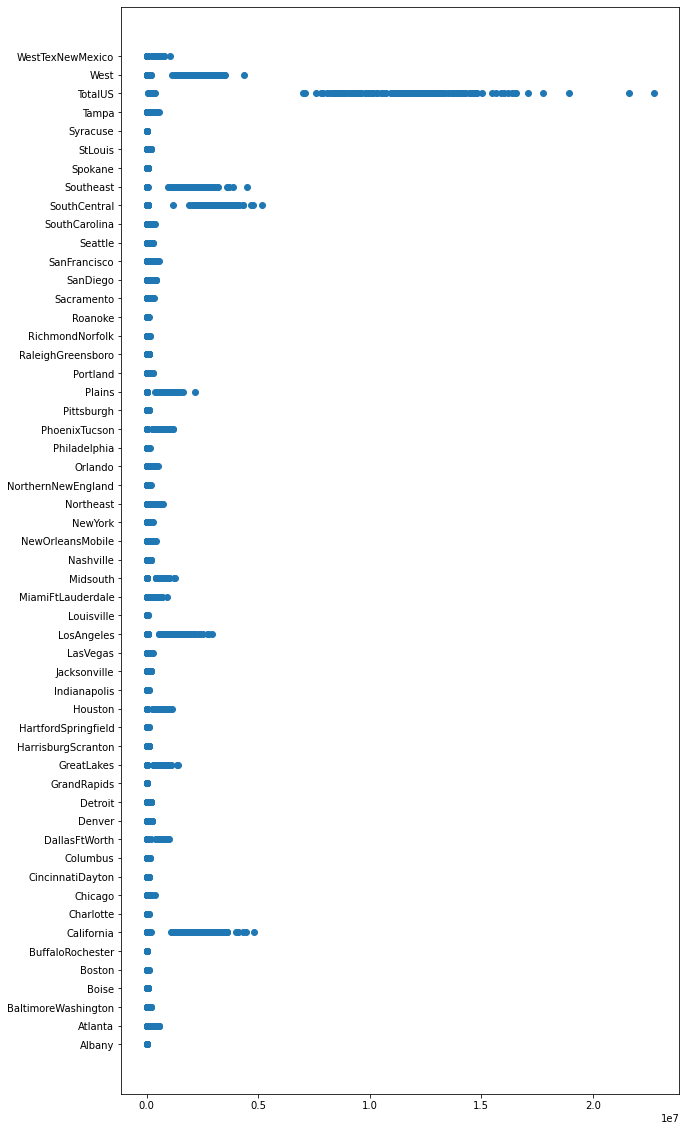

In [19]:
plt.figure(figsize=(10,20))
plt.scatter(df["4046"],df["region"])

# Observation

California,Losangeles,south Central,South east, west have higher sales of 4046

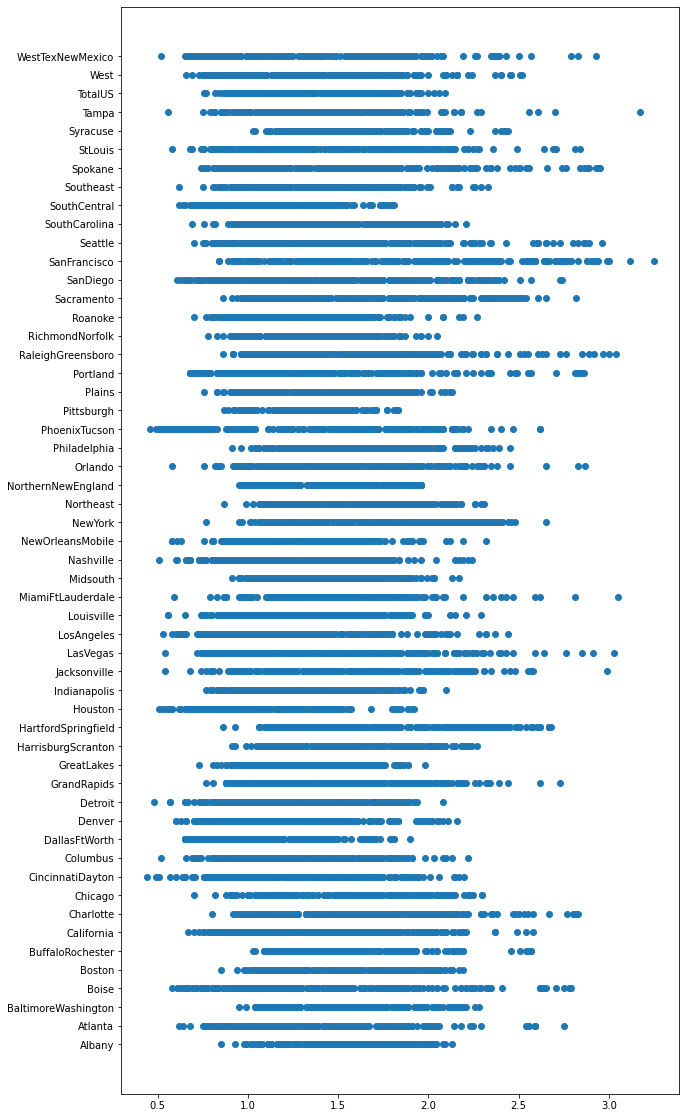

In [20]:
plt.figure(figsize=(10,20))
plt.scatter(df["AveragePrice"],df["region"])

# Observation

average price is higher in seattle,sanfransico,lasvegas,boise,RelighGreenboro

average price is lower in greatlakes,denver,southcentral

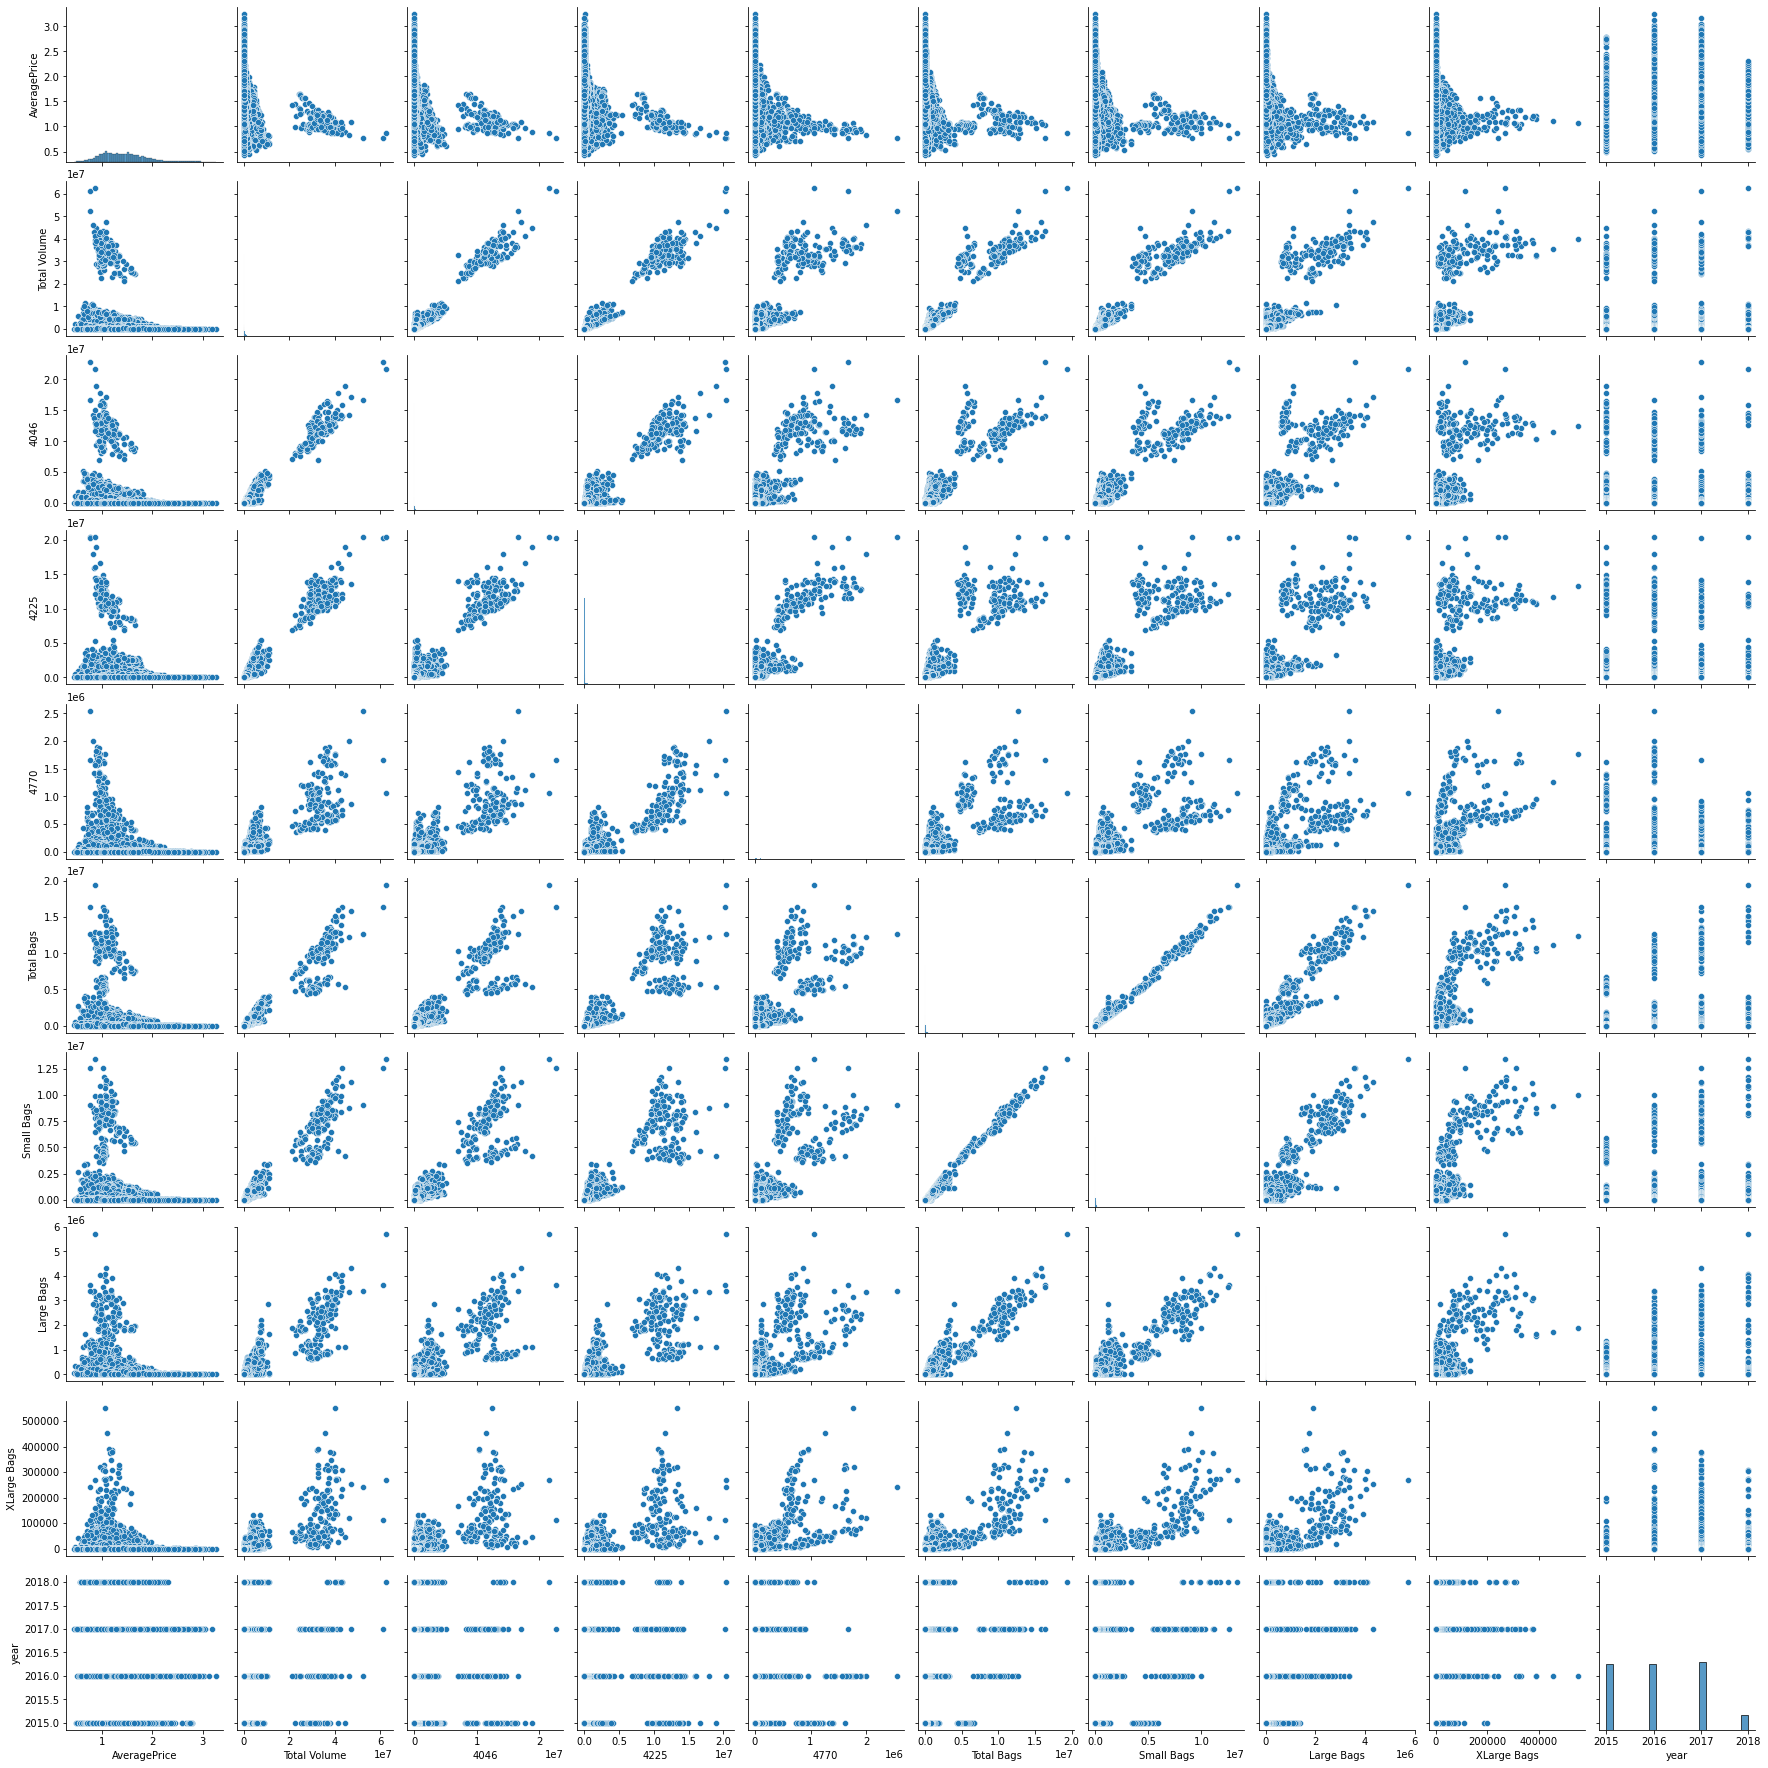

In [60]:
sns.pairplot(df)

# observation

X large bags have positive correlation with large bags small bags totoal bags,4770

large bags have positive correlation with xLarge bags , small bags, total bags,4046 , total volume

total bags and small bags have very high positive correlaiton

total volumne and 4046 have very high correlation

# Encoding

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
le = LabelEncoder()
oe = OrdinalEncoder()
df["region"]  = le.fit_transform(df["region"])
df["Date"]  = oe.fit_transform(df["Date"].values.reshape(-1,1))
df["type"] = oe.fit_transform(df["type"].values.reshape(-1,1))

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0


In [44]:
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region            int32
dtype: object

# Observation

we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

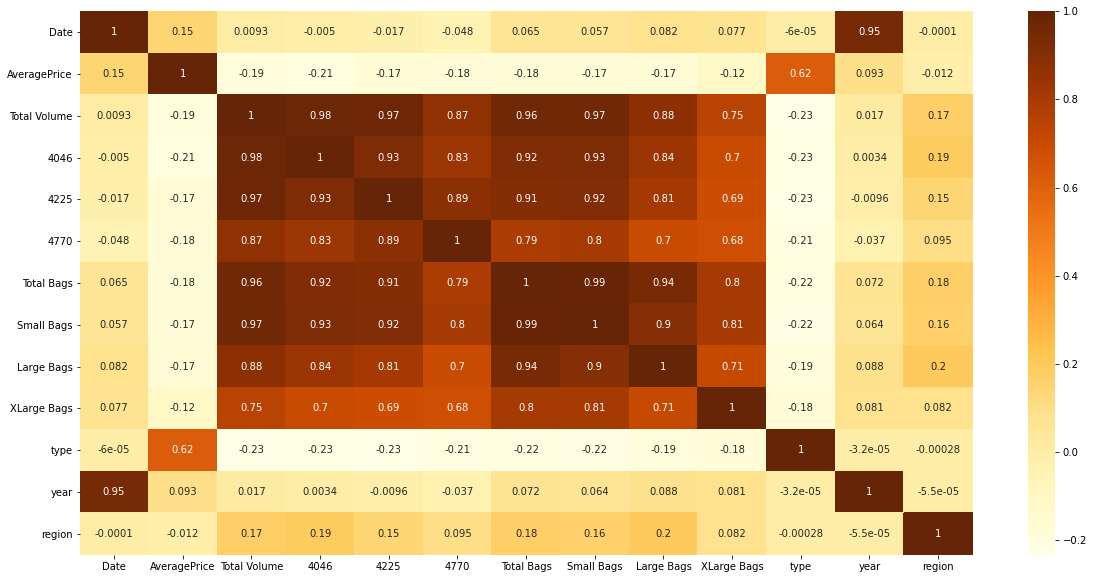

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [46]:
df.corr()["region"].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
Date           -0.000101
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

# observation

Large Bags , 4046,total Bags, Total Volumne, Small Bags , 4225 are higher positive correlation compared to others but correlation is not so strong  

date,year have very minimal corelation

Average Price is negatively corelated

year,date,type has very least or no correlation

droping date

# Skewness

In [10]:
dc1 = df.drop(["region","Date","type"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

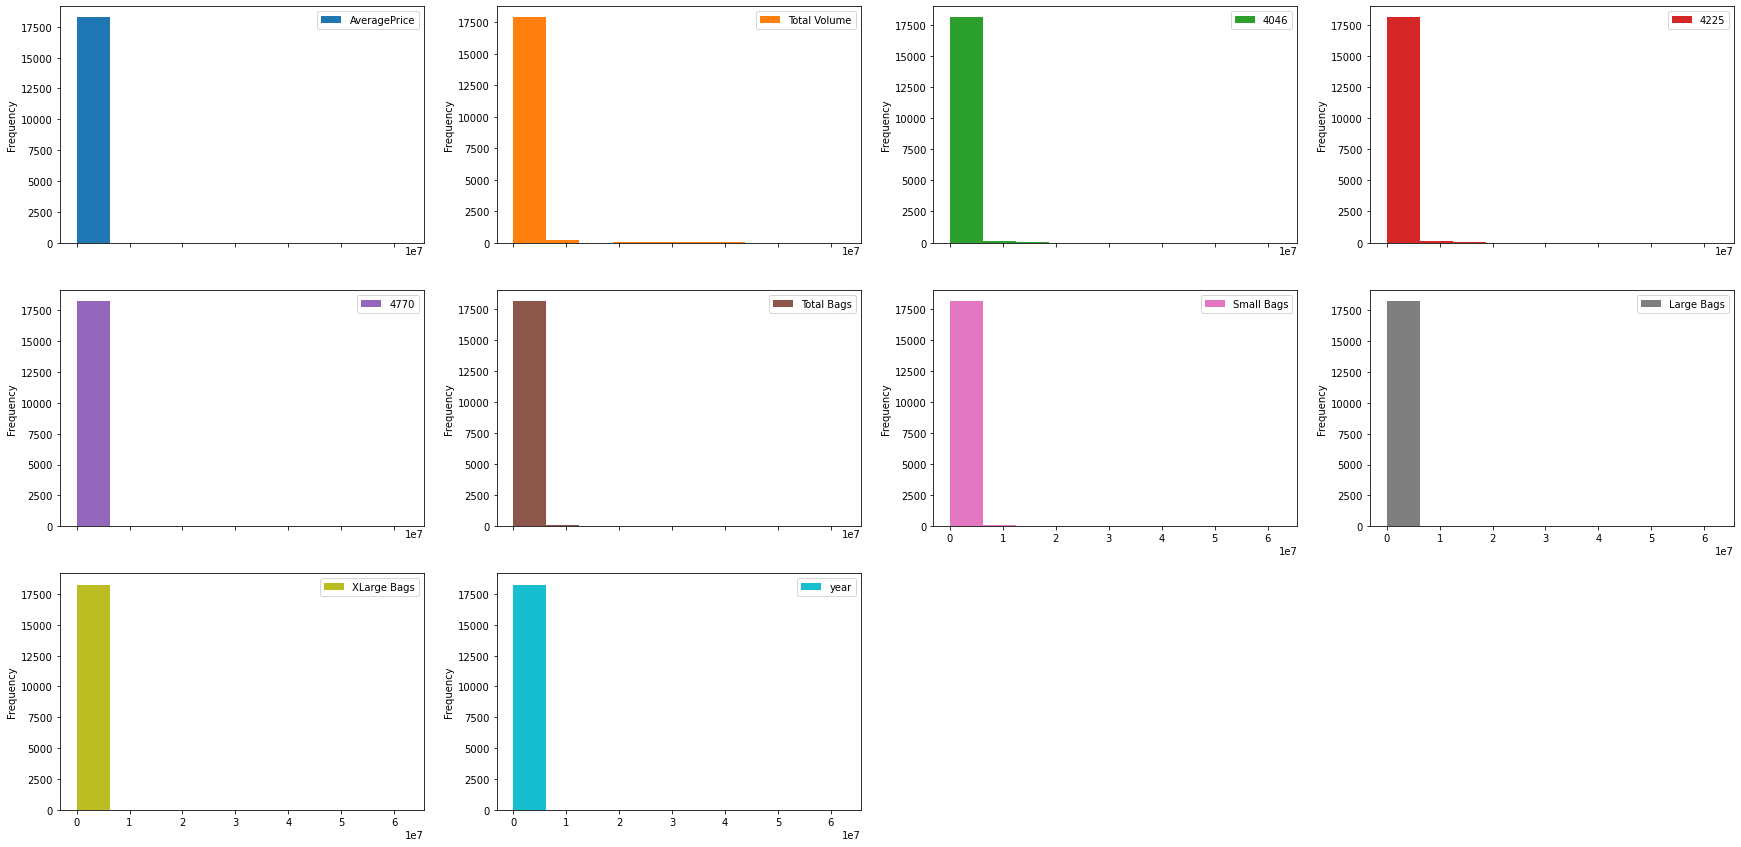

In [48]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [49]:
dc1.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
dtype: float64

# observation

XLarge Bags , 4770,Large Bags,Total Bags,Small Bags,Total Volume,4225,4046 have very high skewness

In [11]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [12]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [52]:
dc2.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.213156
dtype: float64

# observation

XLarge Bags skewness cannot be reduced any further than 0.7 i tried using sqrt, cbrt ,log and  box cox cannot be applied as it has negative value

we have removed skewness

# outlier removal

AveragePrice       AxesSubplot(0.125,0.125;0.065678x0.755)
Total Volume    AxesSubplot(0.203814,0.125;0.065678x0.755)
4046            AxesSubplot(0.282627,0.125;0.065678x0.755)
4225            AxesSubplot(0.361441,0.125;0.065678x0.755)
4770            AxesSubplot(0.440254,0.125;0.065678x0.755)
Total Bags      AxesSubplot(0.519068,0.125;0.065678x0.755)
Small Bags      AxesSubplot(0.597881,0.125;0.065678x0.755)
Large Bags      AxesSubplot(0.676695,0.125;0.065678x0.755)
XLarge Bags     AxesSubplot(0.755508,0.125;0.065678x0.755)
year            AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

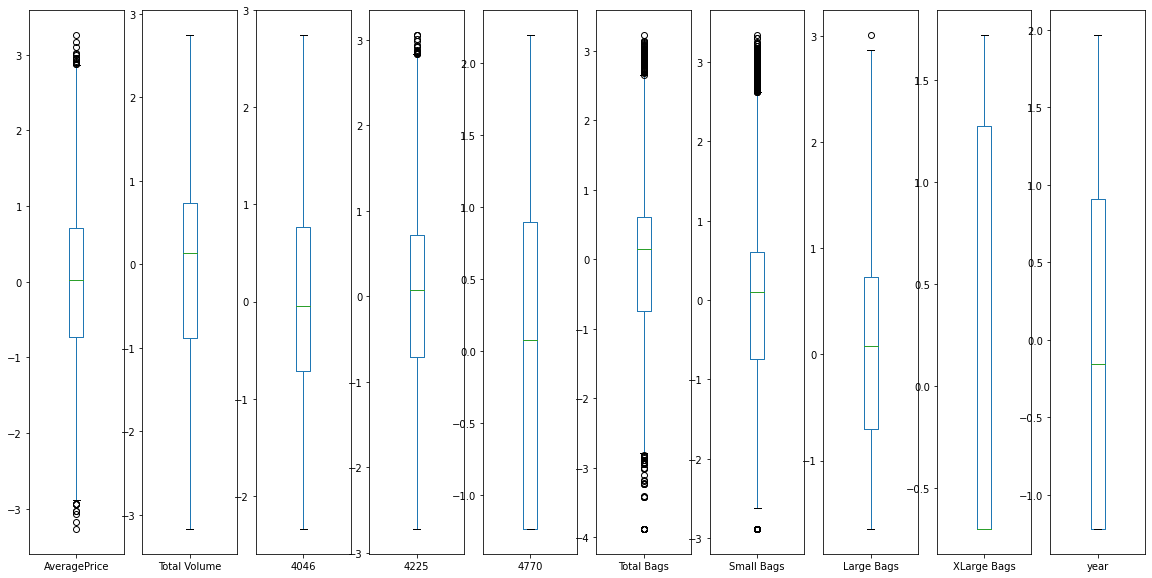

In [53]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [13]:
dc2.shape

(18249, 10)

In [16]:
from scipy.stats import zscore

In [17]:
z = np.abs(zscore(dc2))

In [18]:
np.where(z>3)

(array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
         5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
         5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
         5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
         8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
         8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
         8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
         8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
         9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
         9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
         9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
        11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
        11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
        11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
      

In [19]:
df1 = dc2[(z<3).all(axis=1)]

In [20]:
df1.shape

(18141, 10)

# observation

the outliers are removed

# data loss

In [21]:
((18249-18141)/18249)*100

0.5918132500410981

# observation

0.5 % Data loss

# creating categorical data dataframe

In [22]:
dfc = pd.DataFrame()
dfc["region"] = df["region"]
dfc["Date"] = df["Date"]
dfc["type"] =df["type"]
dfc.shape

(18249, 3)

# removing the outlier removed rows in categorical dataframe

In [23]:
dfc.drop([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
         5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
         5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
         5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
         8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
         8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
         8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
         8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
         9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
         9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
         9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
        11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
        11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
        11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
        14404, 15261, 15262, 15473, 16055, 16720, 17428],axis=0,inplace=True)

In [24]:
dfc.shape

(18141, 3)

# Multicolinearity Checking

# variance inflation factor

In [25]:
dft = df1.join(dfc)
dft.drop("region",axis=1,inplace=True)
dft.shape

(18141, 12)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(12)]
vif["feature names"] = dft.columns

In [28]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
1,52.907639,Total Volume
5,34.762175,Total Bags
6,15.662493,Small Bags
3,11.916082,4225
2,6.866738,4046
11,6.809191,type
10,5.454229,Date
4,4.110704,4770
7,3.445972,Large Bags
9,2.593582,year


# observation

Total Volume has high vif index so dropping it

In [29]:
dft.drop("Total Volume",axis=1,inplace=True)

In [30]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(11)]
vif["feature names"] = dft.columns

In [31]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
4,24.655207,Total Bags
5,15.662450,Small Bags
10,6.541992,type
9,5.288545,Date
2,4.698706,4225
3,4.101085,4770
1,3.803342,4046
6,3.360054,Large Bags
8,2.560051,year
7,2.119971,XLarge Bags


# observation

Total Bags has high vif index so dropping it

In [32]:
dft.drop("Total Bags",axis=1,inplace=True)

In [33]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(10)]
vif["feature names"] = dft.columns

In [34]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
9,6.539255,type
8,5.288480,Date
2,4.427023,4225
4,4.213172,Small Bags
3,4.101085,4770
1,3.794734,4046
7,2.498288,year
6,2.119034,XLarge Bags
5,2.110781,Large Bags
0,1.820430,AveragePrice


# observaiton

now vif index is within limit so mulitcollinearity is removed from this data set

Multicolinearity Removed

# Standard Scaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [37]:
x_final.shape

(18141, 10)

# observation

we have scaled the input data

# model Training starts

# Importing required libraries

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y = dfc.iloc[:,0]

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [118]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
fl = [dtc,knc,rfc,abc]

rand=0
acc=0
oo=0
for i in algo:
    for ii in range(0,100):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)    

 the best random state is 16 and accuracy score is 0.8241939928354919 for algorithm DecisionTreeClassifier()
 the best random state is 16 and accuracy score is 0.8556076054009369 for algorithm KNeighborsClassifier()
 the best random state is 71 and accuracy score is 0.9352438688343896 for algorithm RandomForestClassifier()
 the best random state is 71 and accuracy score is 0.9352438688343896 for algorithm AdaBoostClassifier()


In [135]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='auto', r...",0.936622,0.716225
1,KNeighborsClassifier(),0.855608,0.534533
0,DecisionTreeClassifier(),0.826674,0.573125
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.056765,0.052589


In [137]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

# running Support vector classifier induvidually as it consumes more memory

In [119]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.8206117387710113, the cross validation score is 0.6149602780249631 for SVC


# Observation

from all the classifier models random forest performed best with accuracy of 93 % and cross val score of 71 %

# HyperParameter Tunining

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100,200]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200]})

In [143]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [145]:
gsv.best_score_

0.918894947668148

# using the best parameters got in grid search 

In [147]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='auto',min_samples_leaf=1,n_estimators=200)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9402039129236704, the cross validation score is 0.7173277982733117 


In [155]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        77
           1       0.89      0.93      0.91        68
           2       0.97      1.00      0.99        75
           3       0.94      0.92      0.93        64
           4       0.95      0.98      0.97        64
           5       0.89      0.95      0.92        75
           6       0.97      1.00      0.99        73
           7       0.96      0.98      0.97        66
           8       0.99      1.00      0.99        75
           9       0.91      0.90      0.91        69
          10       0.87      0.91      0.89        75
          11       0.98      0.94      0.96        63
          12       0.95      1.00      0.97        58
          13       0.94      0.95      0.94        63
          14       0.95      0.94      0.95        65
          15       1.00      0.99      0.99        68
          16       0.99      0.93      0.96        74
          17       0.94    

In [156]:
print(confusion_matrix(test_y,pred))

[[68  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  1 67  0]
 [ 0  1  0 ...  0  0 59]]


# saving the model

In [152]:
import joblib
joblib.dump(rf,"avocado.pkl")

['avocado.pkl']

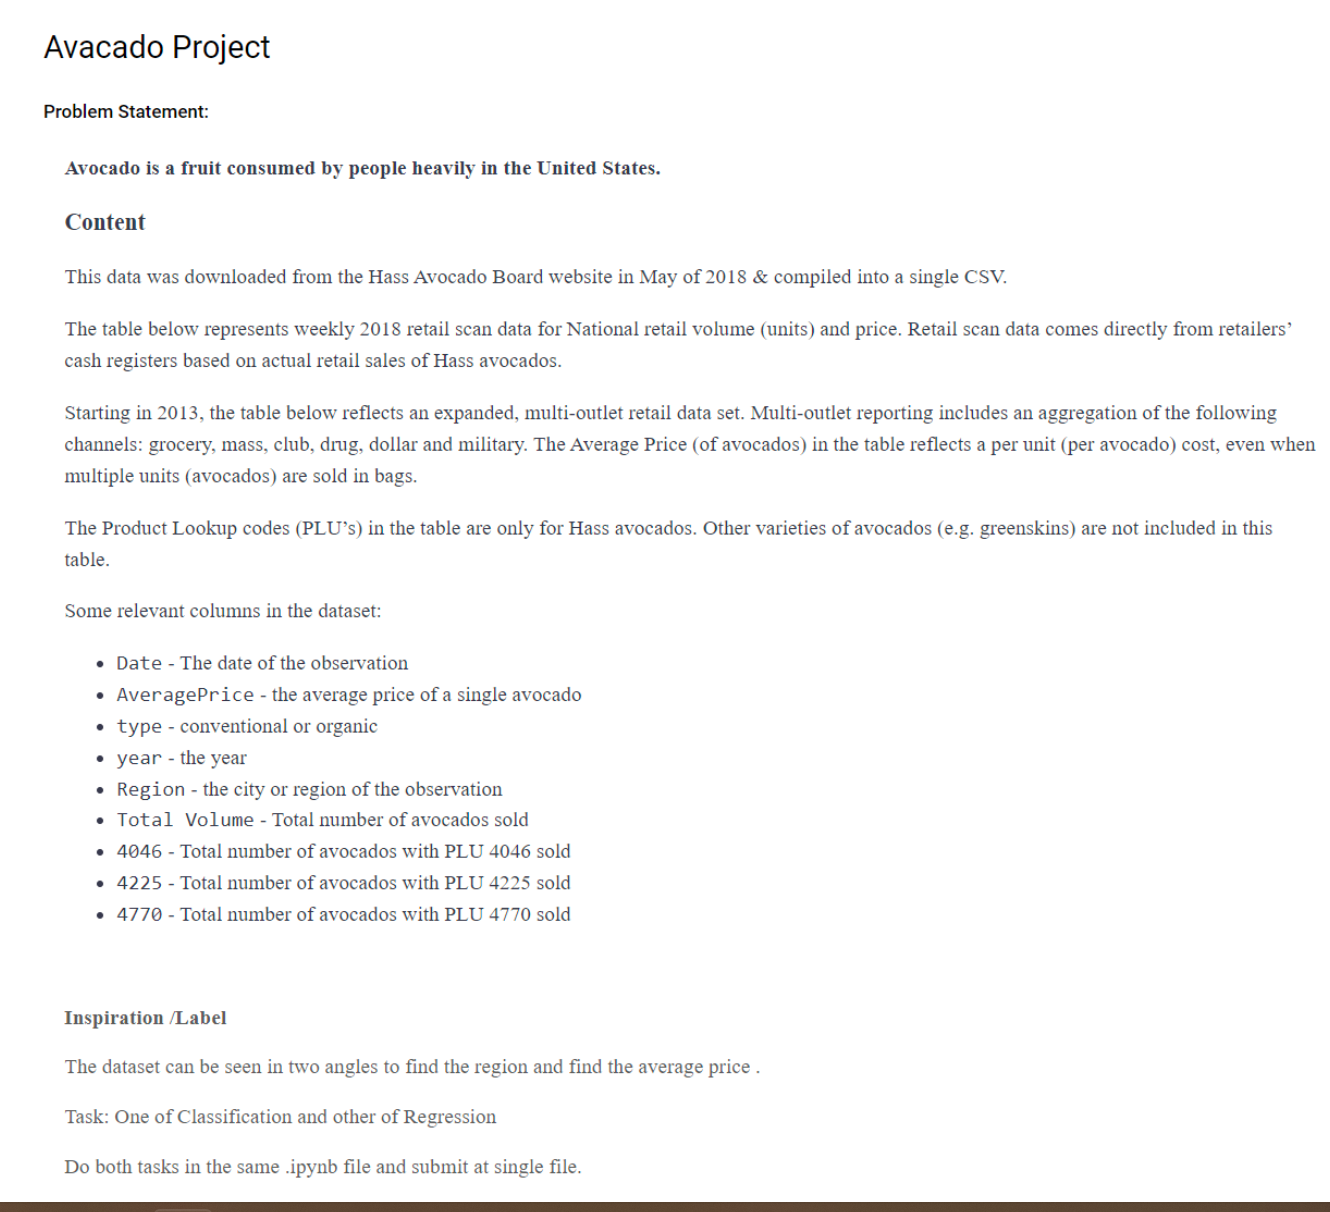

# Predicting the average price

In [23]:
df = pd.read_csv("avocado.csv")

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [25]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# Encoding

In [26]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df["region"]  = oe.fit_transform(df["region"].values.reshape(-1,1))
df["Date"]  = oe.fit_transform(df["Date"].values.reshape(-1,1))
df["type"] = oe.fit_transform(df["type"].values.reshape(-1,1))

# Skewness Check

In [27]:
dc1 = df.drop(["region","Date","type","AveragePrice"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

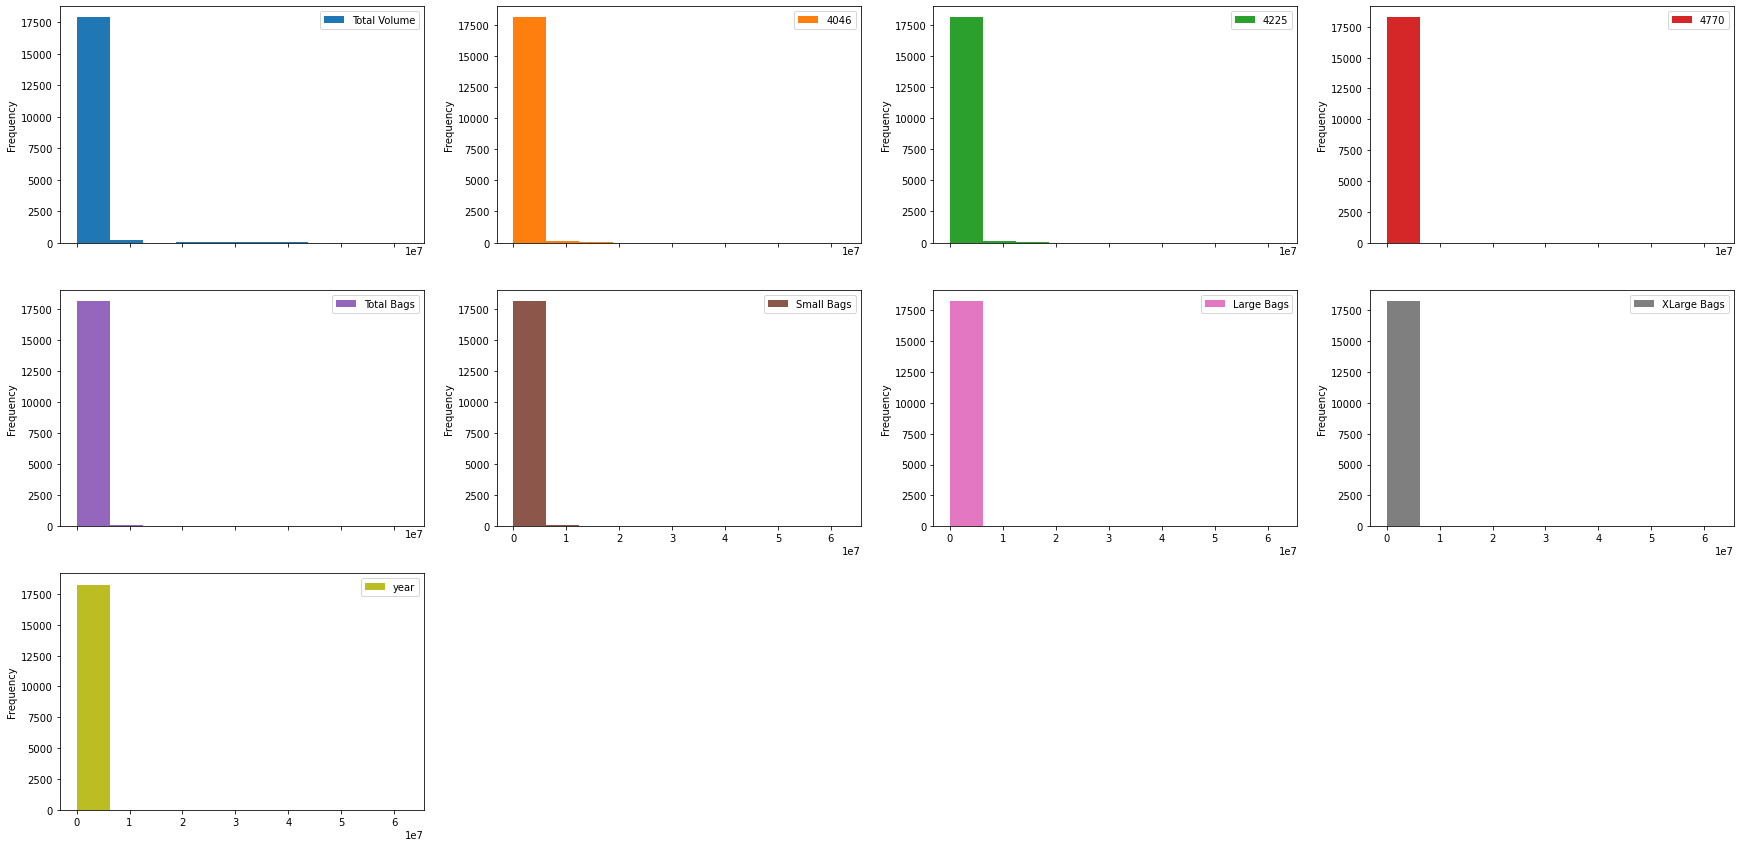

In [80]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [81]:
dc1.skew().sort_values(ascending=False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
year             0.215339
dtype: float64

# Observation

skewness found so using power_transform to remove skewness

In [28]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [29]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [30]:
dc2.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.213156
dtype: float64

# observation

skewness removed from data

# Outlier check

In [31]:
from scipy.stats import zscore

Total Volume       AxesSubplot(0.125,0.125;0.0731132x0.755)
4046            AxesSubplot(0.212736,0.125;0.0731132x0.755)
4225            AxesSubplot(0.300472,0.125;0.0731132x0.755)
4770            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Total Bags      AxesSubplot(0.475943,0.125;0.0731132x0.755)
Small Bags      AxesSubplot(0.563679,0.125;0.0731132x0.755)
Large Bags      AxesSubplot(0.651415,0.125;0.0731132x0.755)
XLarge Bags     AxesSubplot(0.739151,0.125;0.0731132x0.755)
year            AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

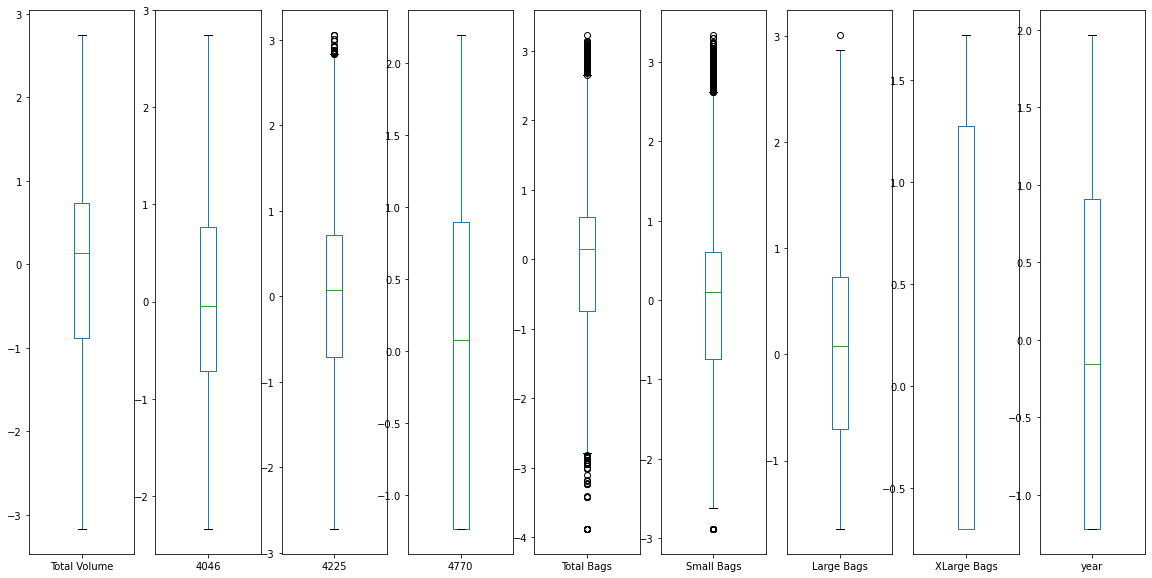

In [86]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [32]:
z = np.abs(zscore(dc2))

In [33]:
np.where(z>3)

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
         5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
         5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
         8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
         8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
         8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
         8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
         8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
         9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
         9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
         9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11321,
        11322, 11325, 11326, 11332, 11333, 11336, 11338, 11340, 11342,
        11347, 11348, 11349, 11350, 11354, 11387, 11388, 11594, 11595,
        11596, 11597, 11614, 11662, 12132, 14404], dtype=int64),
 array([2, 5

# Observation

# outliers found so proceeding for zscore outlie removal

In [34]:
df1 = dc2[(z<3).all(axis=1)]

In [35]:
df1.shape

(18151, 9)

In [36]:
dc2.shape

(18249, 9)

# Data Loss

In [37]:
((18249-18151)/18249)*100

0.5370157268891446

# Creating Categorical DataFrame with target variable

In [38]:
dfc = pd.DataFrame()
dfc["region"] = df["region"]
dfc["Date"] = df["Date"]
dfc["type"] =df["type"]
dfc["AveragePrice"] =df["AveragePrice"]
dfc.shape

(18249, 4)

# removing outliers rows in Dataframe we created earlier

In [39]:
dfc.drop([2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
         5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
         5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
         8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
         8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
         8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
         8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
         8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
         9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
         9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
         9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11321,
        11322, 11325, 11326, 11332, 11333, 11336, 11338, 11340, 11342,
        11347, 11348, 11349, 11350, 11354, 11387, 11388, 11594, 11595,
        11596, 11597, 11614, 11662, 12132, 14404],inplace=True,axis=0)

In [40]:
dfc.shape

(18151, 4)

# Mulitcolinearity Checking 

# variance inflation factor

In [41]:
dft = df1.join(dfc)
dft.drop("AveragePrice",axis=1,inplace=True)
dft.shape

(18151, 12)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(12)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
0,51.481097,Total Volume
4,34.234945,Total Bags
5,15.131005,Small Bags
2,10.998343,4225
10,7.669319,Date
1,7.220830,4046
11,6.717777,type
3,4.121309,4770
9,4.020571,region
6,3.430486,Large Bags


# Observation

Total Volume has high vif index so dropping it

In [44]:
dft.drop("Total Volume",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(11)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
3,22.858698,Total Bags
4,15.114890,Small Bags
9,7.333070,Date
10,6.360663,type
1,4.452015,4225
2,4.113130,4770
8,4.005509,region
0,3.958039,4046
5,3.356319,Large Bags
7,2.793371,year


# Observation

Total Bags have high Vif index so dropping it 

In [45]:
dft.drop("Total Bags",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(10)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
8,7.317689,Date
9,6.342155,type
1,4.289296,4225
3,4.181002,Small Bags
2,4.113128,4770
7,4.005500,region
0,3.927800,4046
6,2.780214,year
5,2.122997,XLarge Bags
4,1.958117,Large Bags


# Multicolinearity Removed

# Standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [47]:
x_final.shape

(18151, 10)

In [48]:
y = dfc.iloc[:,3]

# Model Training Starts

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# This Code Block ranks algorithm whcih performed best based on cross val score and test score

In [118]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   

the best random state is 47 and best accuracy is 0.521875871486271 for LinearRegression()
the training score is 0.521875871486271 the testing score is 0.4909293180771075 the cross val score is 0.1047906719092124 for LinearRegression()
the best random state is 0 and best accuracy is 1.0 for DecisionTreeRegressor()
the training score is 1.0 the testing score is 0.7989030642949814 the cross val score is -0.028562391523300333 for DecisionTreeRegressor()
the best random state is 47 and best accuracy is 0.521875807121117 for Ridge()
the training score is 0.521875807121117 the testing score is 0.49093574291424924 the cross val score is 0.1049011540673864 for Ridge()
the best random state is 0 and best accuracy is 0 for Lasso()
the training score is 0.0 the testing score is -0.00189133798344443 the cross val score is -1.212602507868144 for Lasso()
the best random state is 42 and best accuracy is 0.9177690837044425 for KNeighborsRegressor()
the training score is 0.9177690837044425 the testing s

In [119]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
5,"(DecisionTreeRegressor(max_features='auto', ra...",0.987135,0.898762,0.426396
4,KNeighborsRegressor(),0.917769,0.851222,0.245843
2,Ridge(),0.521876,0.490936,0.104901
0,LinearRegression(),0.521876,0.490929,0.104791
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.617641,0.607789,0.090118
1,DecisionTreeRegressor(),1.000000,0.798903,-0.028562
3,Lasso(),0.000000,-0.001891,-1.212603


# Decision Tree Performed Best compared to all

# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
rf = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100,200]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200]})

In [52]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

# Running Random Forest with Best Parameters

In [54]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,n_estimators=200)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=19)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 1.0 the testing score is 0.914949185876551 the cross val score is 0.5024453193688219
Mean Squared Error 0.013651021295446177
Mean Absolute Error 0.07887765332354015
Root Mean Squared Error 0.11683758511474883
R2 Score 0.914949185876551


# after tuning training score gets 100% andtesting score 91 % and cross val socre 50%

# Saving the prediciton

In [55]:
answer = pd.DataFrame(pred)
answer.head()

,0
0,1.33965
1,1.58565
2,0.78680
3,1.73420
4,1.33130


# Saving the model

In [56]:
import joblib
joblib.dump(rf,"avocado.pkl")

['avocado.pkl']